Time taken to run the model:  0.15571808815002441 seconds
Time taken in ms:  155.7180881500244 ms


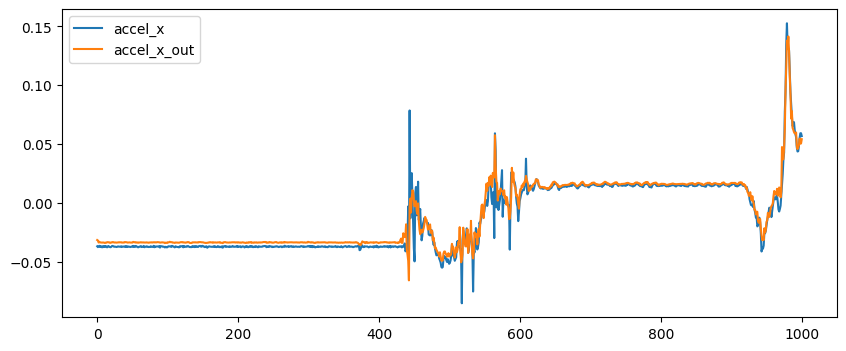

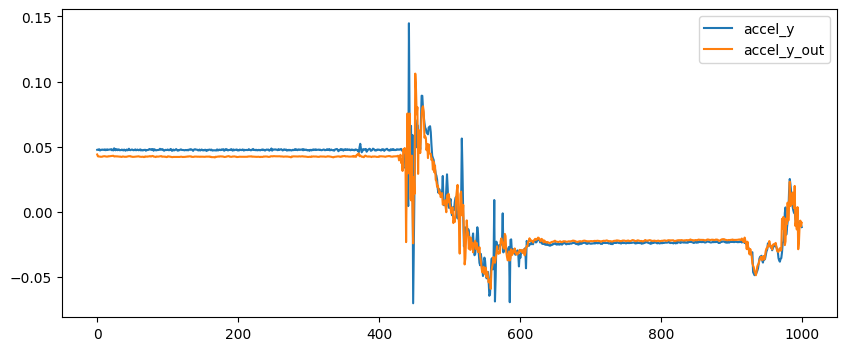

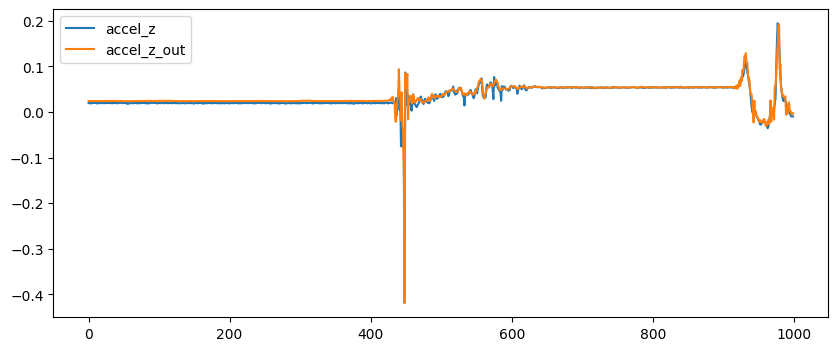

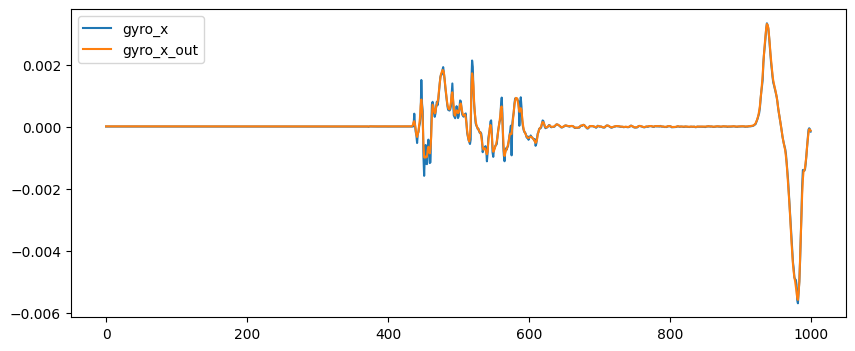

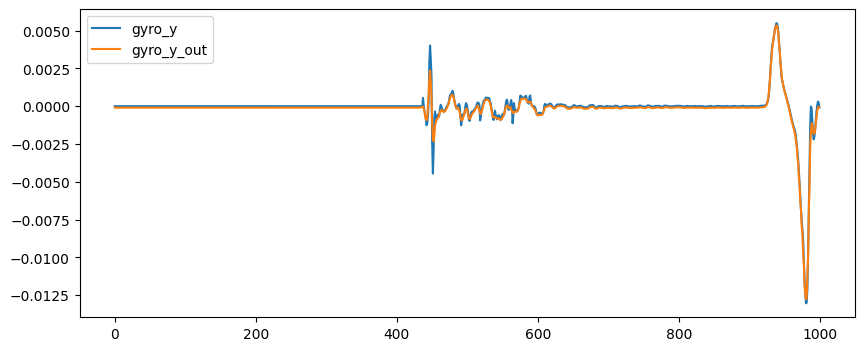

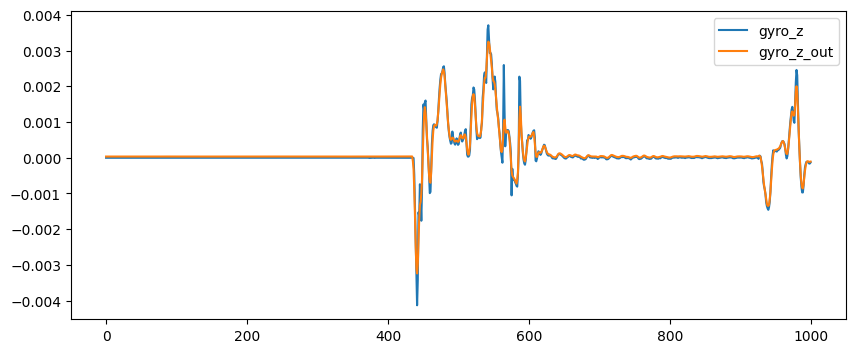

In [34]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import time

path = './autoencoder/single_axis'
accel_x_model = tf.saved_model.load(f'{path}/accel_x')
accel_y_model = tf.saved_model.load(f'{path}/accel_y')
accel_z_model = tf.saved_model.load(f'{path}/accel_z')
gyro_x_model = tf.saved_model.load(f'{path}/gyro_x')
gyro_y_model = tf.saved_model.load(f'{path}/gyro_y')
gyro_z_model = tf.saved_model.load(f'{path}/gyro_z')

file = "../data/Raw/logRaws/20230916_01_16_54_377_1018_logRaws.csv"
df = pd.read_csv(file, usecols=[16, 17, 18, 22, 23, 24], header=None)
df.columns = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']
df.astype('float32')

# normalize
# accel: [-16, 16] -> [-1, 1]
# gyro: [-2000, 2000] -> [-1, 1]
df /= [16, 16, 16, 2000, 2000, 2000]

data_accel_x = tf.constant(df['accel_x'].values.reshape(1, 1000, 1), dtype=tf.float32)
data_accel_y = tf.constant(df['accel_y'].values.reshape(1, 1000, 1), dtype=tf.float32)
data_accel_z = tf.constant(df['accel_z'].values.reshape(1, 1000, 1), dtype=tf.float32)
data_gyro_x = tf.constant(df['gyro_x'].values.reshape(1, 1000, 1), dtype=tf.float32)
data_gyro_y = tf.constant(df['gyro_y'].values.reshape(1, 1000, 1), dtype=tf.float32)
data_gyro_z = tf.constant(df['gyro_z'].values.reshape(1, 1000, 1), dtype=tf.float32)

start_time = time.time()
accel_x_output = accel_x_model(data_accel_x)
finish_time = time.time()

print("Time taken to run the model: ", finish_time - start_time, "seconds")
print("Time taken in ms: ", (finish_time - start_time) * 1000, "ms")

accel_y_output = accel_y_model(data_accel_y)
accel_z_output = accel_z_model(data_accel_z)
gyro_x_output = gyro_x_model(data_gyro_x)
gyro_y_output = gyro_y_model(data_gyro_y)
gyro_z_output = gyro_z_model(data_gyro_z)

# plot
plt.figure(figsize=(10, 4))
plt.plot(df['accel_x'], label='accel_x')
plt.plot(accel_x_output[0, :], label='accel_x_out')
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(df['accel_y'], label='accel_y')
plt.plot(accel_y_output[0, :], label='accel_y_out')
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(df['accel_z'], label='accel_z')
plt.plot(accel_z_output[0, :], label='accel_z_out')
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(df['gyro_x'], label='gyro_x')
plt.plot(gyro_x_output[0, :], label='gyro_x_out')
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(df['gyro_y'], label='gyro_y')
plt.plot(gyro_y_output[0, :], label='gyro_y_out')
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(df['gyro_z'], label='gyro_z')
plt.plot(gyro_z_output[0, :], label='gyro_z_out')
plt.legend()
plt.show()
